# Anomaly Detection Examples with R MASS UScrime data by Ridge Regression

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P170-172 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### データの読み込みと確認

In [2]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/MASS/UScrime.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234
6,121,0,110,118,115,547,964,25,44,84,29,689,126,0.034201,20.9995,682
7,127,1,111,82,79,519,982,4,139,97,38,620,168,0.042100,20.6993,963
8,131,1,109,115,109,542,969,50,179,79,35,472,206,0.040099,24.5988,1555
9,157,1,90,65,62,553,955,39,286,81,28,421,239,0.071697,29.4001,856
10,140,0,118,71,68,632,1029,7,15,100,24,526,174,0.044498,19.5994,705


説明変数と目的変数の抽出

In [4]:
x = df.drop(['So','y'], axis=1)
y = df['y']

lambda の値でグリッドサーチを行う

In [5]:
lambdas = np.linspace(0, 5, 50)

grid = GridSearchCV(Ridge(),
                    {'alpha': lambdas },
                    iid=False,
                    cv=20) # 20-fold cross-validation
grid.fit(x, y)
print(grid.best_params_)

{'alpha': 0.0}


Rでの実行例と異なり、alpha（lambda） が  0.0、つまり正則化なしのモデルが最良ということになった

In [11]:
grid.best_estimator_

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
y_pred = grid.best_estimator_.predict(x)

### 予測値と実際の値のプロット

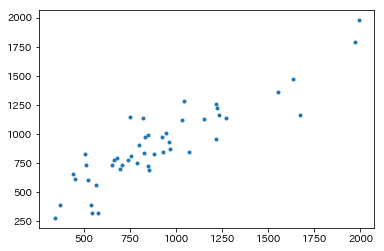

In [7]:
plt.plot(y, y_pred, '.')
plt.show()

### 異常度の計算

In [8]:
coefs = grid.best_estimator_.coef_
lam = grid.best_params_['alpha']
sig2 = (lam * np.sum(coefs**2) + np.sum(y_pred - y)**2) / len(x)
x_ = x - np.mean(x, axis=0)
h = x_.dot(np.linalg.inv(x_.T.dot(x_)) + lam * np.ones(len(x.columns)))
trhn = np.sum(np.matrix.trace(h.to_numpy())) / len(x)
a = (y_pred - y)**2/((1 - trhn)**2 * sig2)

閾値を95%分位点に設定

In [9]:
th = np.percentile(a, 95)

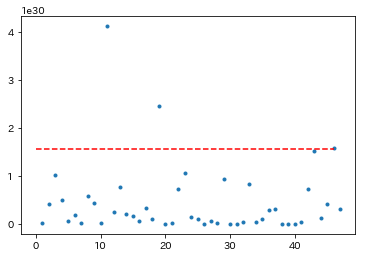

In [10]:
plt.plot(a, '.')
plt.plot(np.repeat(th, len(x)), 'r--')
plt.show()